In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from DynamicModel_Package.ModelBase import DynamicModel

(            t          x         y         v         z
 0        0.00   0.990000  0.010000  0.000000  0.010000
 1        0.01   0.999901  0.009949  0.000100  0.009996
 2        0.02   1.009800  0.009899  0.000179  0.009992
 3        0.03   1.019697  0.009851  0.000243  0.009988
 4        0.04   1.029593  0.009803  0.000293  0.009984
 ...       ...        ...       ...       ...       ...
 9996    99.96  59.425541  0.000000  0.000000  0.143568
 9997    99.97  59.429598  0.000000  0.000000  0.143496
 9998    99.98  59.433655  0.000000  0.000000  0.143424
 9999    99.99  59.437712  0.000000  0.000000  0.143352
 10000  100.00  59.441768  0.000000  0.000000  0.143281
 
 [10001 rows x 5 columns],
 <Figure size 640x480 with 4 Axes>,
 array([<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'v'}>,
        <AxesSubplot: title={'center': 'z'}>], dtype=object))

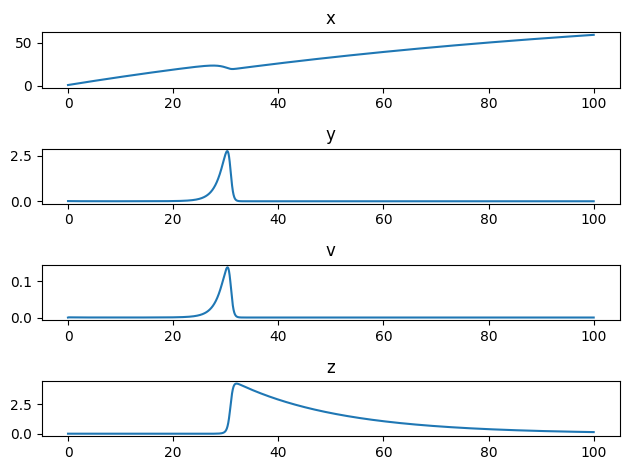

In [ ]:
# ODE system
def virus_immune_model(t, y, λ, d, β, a, p, k, u, c, b):
    x, y_, v, z = y
    dxdt = λ - d * x - β * x * v
    dydt = β * x * v - a * y_ - p * y_ * z
    dvdt = k * y_ - u * v
    dzdt = c * y_ * z - b * z
    return [dxdt, dydt, dvdt, dzdt]

def dxdt (variables,parameters):
    λ = parameters['λ']
    d = parameters['d']
    β = parameters['β']
    x = variables['x']
    v = variables['v']
    return λ - d * x - β * x * v

def dydt (variables,parameters):
    β = parameters['β']
    a = parameters['a']
    p = parameters['p']
    x = variables['x']
    y = variables['y']
    v = variables['v']
    z = variables['z']
    return β * x * v - a * y - p * y * z
def dvdt (variables,parameters):
    k = parameters['k']
    u = parameters['u']
    y = variables['y']
    v = variables['v']
    return  k * y - u * v

def dzdt (variables,parameters):
    c = parameters['c']
    b = parameters['b']
    y = variables['y']
    z = variables['z']
    return  c * y * z - b * z


# Parameters
parameters = {'λ': 1.0,     # Source of uninfected cells
'd' : 0.01,    # Death rate of uninfected cells
'β' : 1.0 ,    # Infection rate
'a' : 0.5,     # Death rate of infected cells
'p' : 1.0,     # CTL-mediated killing
'k' : 1.0,     # Virus production rate
'u' : 20.0,    # Virus clearance rate (to match k/u = 0.05)
'c' : 1.0,     # CTL responsiveness
'b' : 0.05    # CTL decay
}

# Initial conditions: [x, y, v, z]
y0 = {'x':0.99, 'y':0.01, 'v':0.0, 'z':0.01,'t':0.0}

# Time span and evaluation grid
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)
def init_model_nowak (parameters):
    model_nowak = DynamicModel()
    model_nowak.add_variable('x',dxdt,parameters)
    model_nowak.add_variable('y',dydt,parameters)
    model_nowak.add_variable('v',dvdt,parameters)
    model_nowak.add_variable('z',dzdt,parameters)
    return model_nowak
model_nowak = init_model_nowak(parameters)
model_nowak.integrate_and_plot(y0,100,0.01,True,['x','y','v','z'])


0.5
FWHM of virus load (v): 2.66 (from t=55.74 to t=58.40)
FWHM of CTL response (z): 15.38 (from t=58.19 to t=73.57)
0.6428571428571428
FWHM of virus load (v): 2.51 (from t=43.30 to t=45.81)
FWHM of CTL response (z): 15.38 (from t=45.60 to t=60.98)
0.7857142857142857
FWHM of virus load (v): 2.41 (from t=35.79 to t=38.20)
FWHM of CTL response (z): 15.37 (from t=37.98 to t=53.35)
0.9285714285714286
FWHM of virus load (v): 2.32 (from t=30.74 to t=33.06)
FWHM of CTL response (z): 15.35 (from t=32.84 to t=48.19)
1.0714285714285714
FWHM of virus load (v): 2.25 (from t=27.10 to t=29.35)
FWHM of CTL response (z): 15.33 (from t=29.14 to t=44.47)
1.2142857142857142
FWHM of virus load (v): 2.18 (from t=24.35 to t=26.53)
FWHM of CTL response (z): 15.32 (from t=26.32 to t=41.64)
1.3571428571428572
FWHM of virus load (v): 2.14 (from t=22.18 to t=24.32)
FWHM of CTL response (z): 15.29 (from t=24.11 to t=39.40)
1.5
FWHM of virus load (v): 2.09 (from t=20.43 to t=22.52)
FWHM of CTL response (z): 15.29 

Text(1, 0.5, '$r = 0.97$ \n$ p = 0.00$')

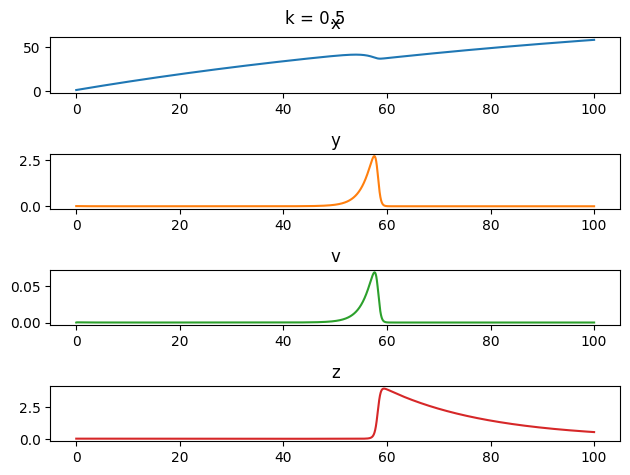

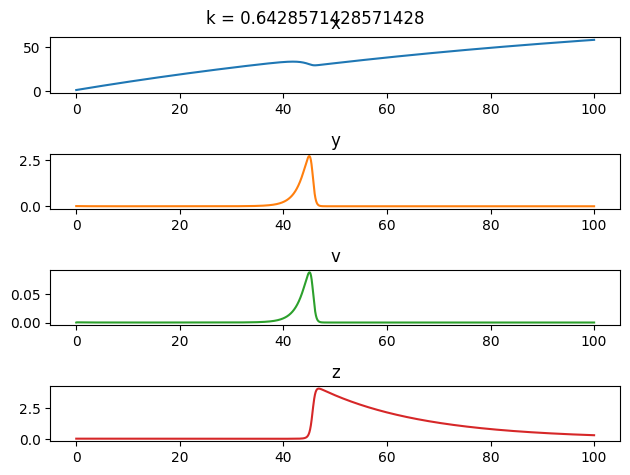

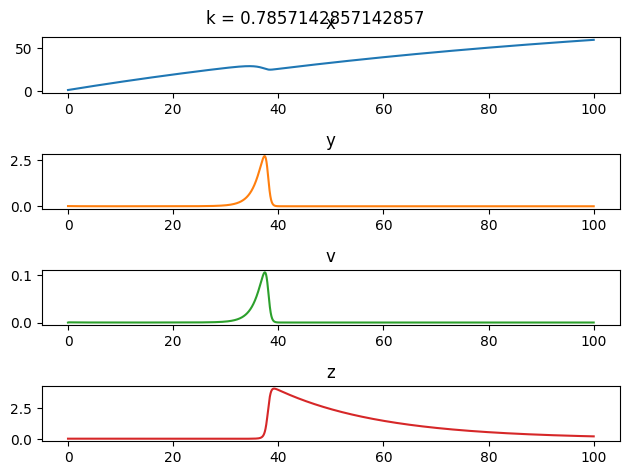

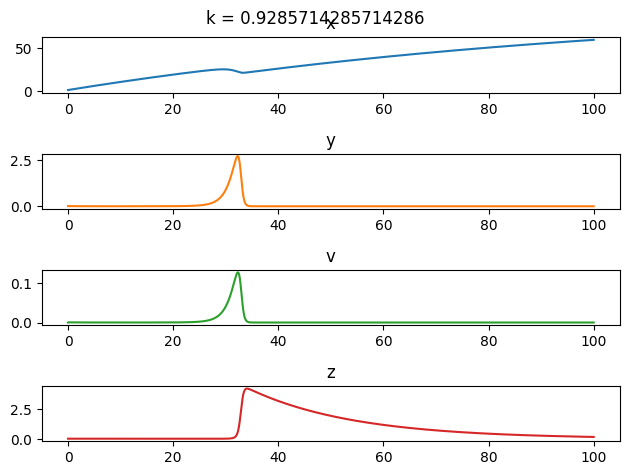

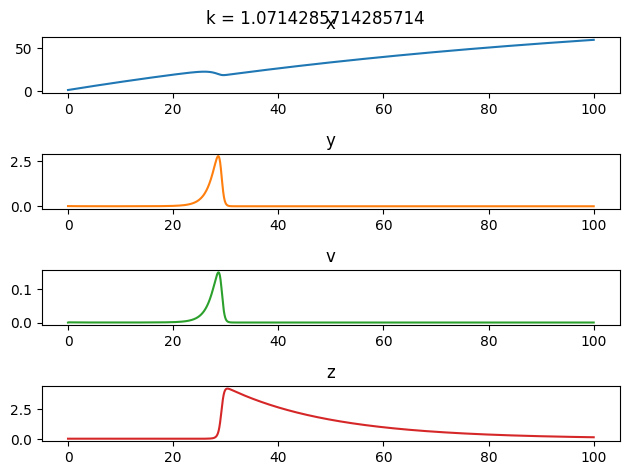

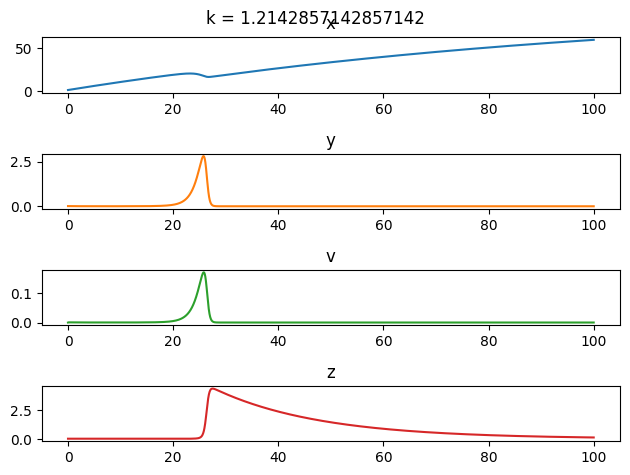

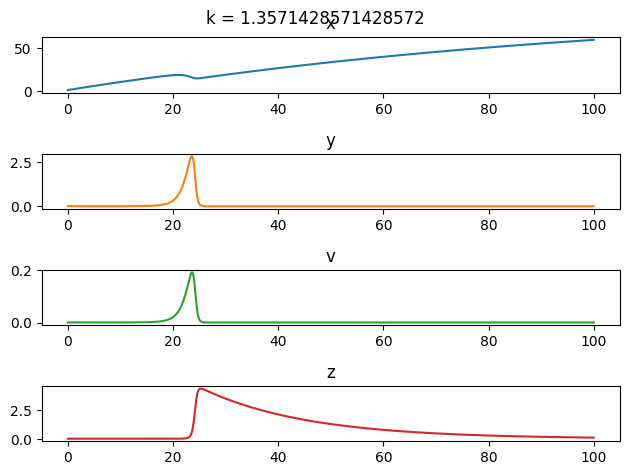

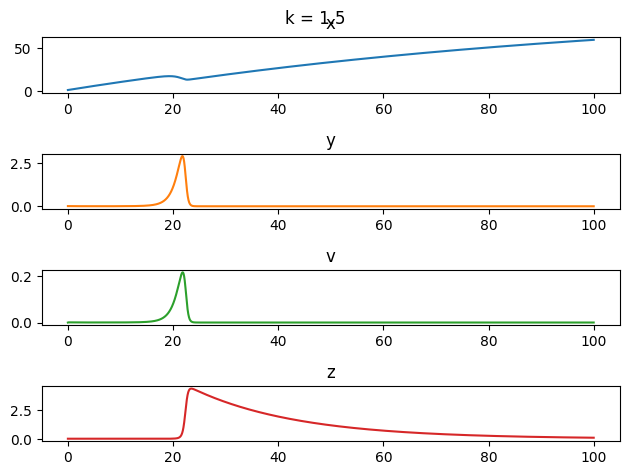

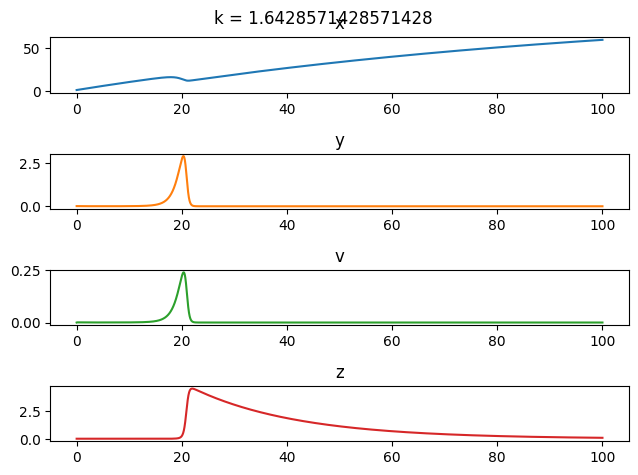

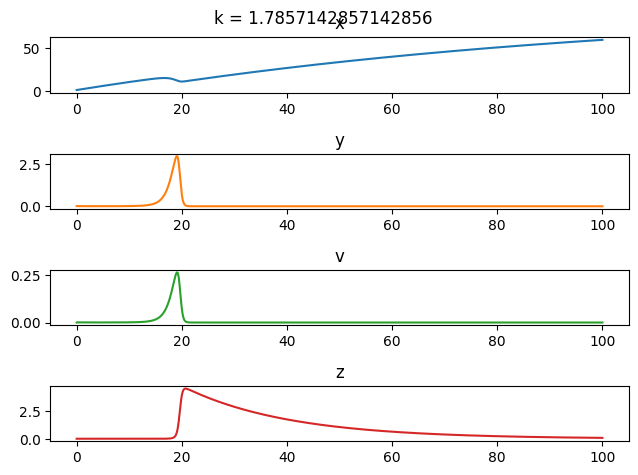

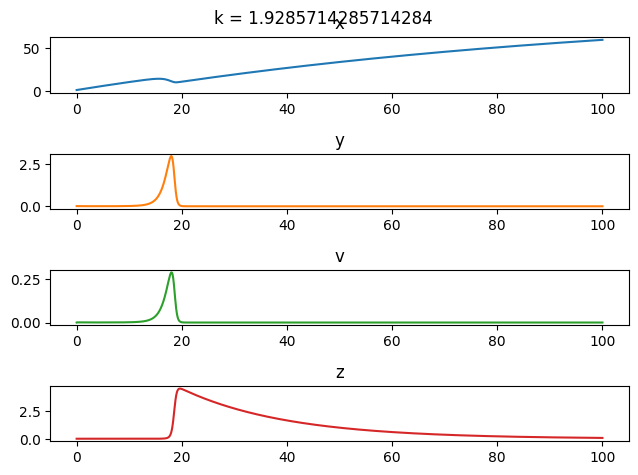

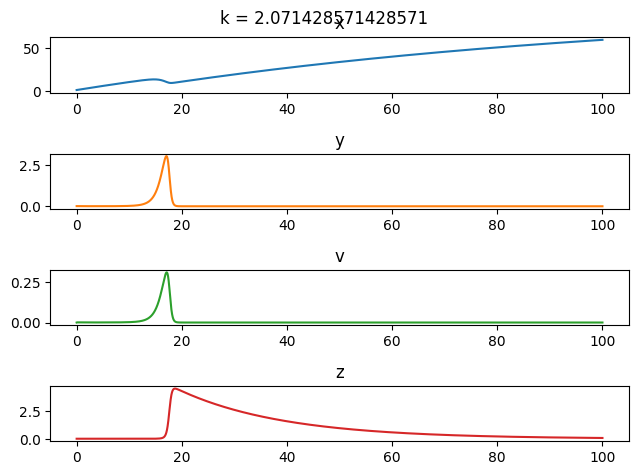

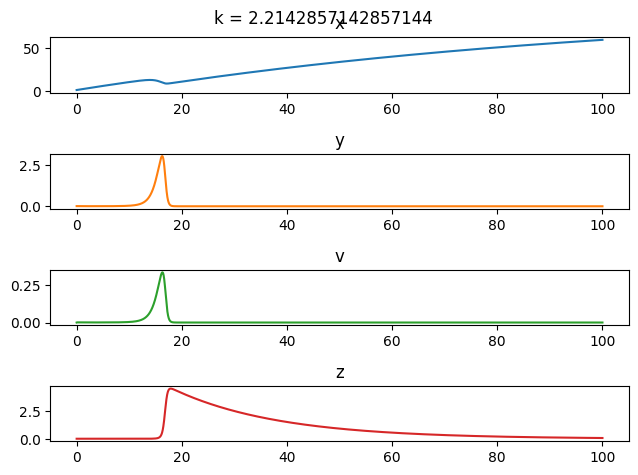

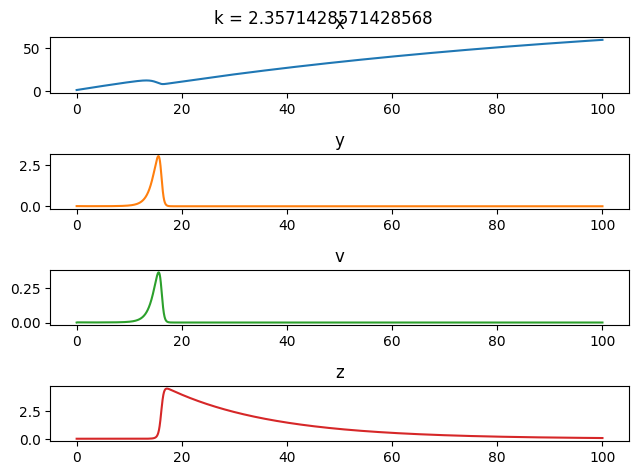

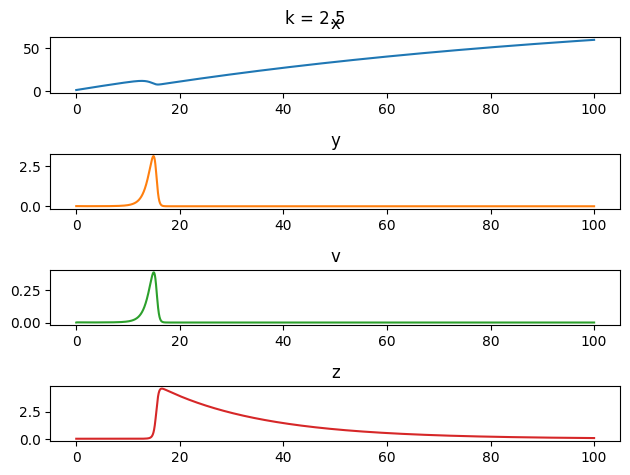

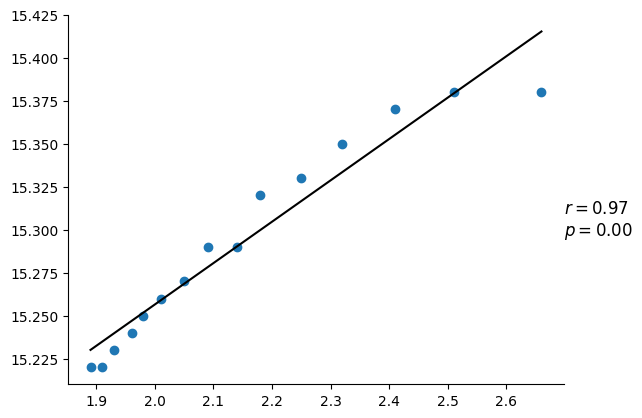

In [51]:
ks = [0.5,0.75,1,1.25]
def loguniform(low=0, high=1, size=None):
    return np.exp(np.random.uniform(low, high, size))

ks = np.linspace(0.5,2.5,15)
v_fwhms = []
z_fwhms = []
def compute_fwhm(t, y):
    """
    Compute Full Width at Half Maximum (FWHM) for a 1D time series y(t).
    
    Parameters:
    - t: time points (1D array)
    - y: signal values (1D array)
    
    Returns:
    - fwhm_time: duration for which y > 0.5 * max(y)
    - t_start, t_end: time bounds of FWHM interval
    """
    half_max = 0.5 * np.max(y)
    above_half = y > half_max
    if not np.any(above_half):
        return 0.0, None, None

    indices = np.where(above_half)[0]
    t_start = t[indices[0]]
    t_end = t[indices[-1]]
    fwhm_time = t_end - t_start
    return fwhm_time, t_start, t_end

for k in ks:
    parameters = {'λ': 1.0,     # Source of uninfected cells
    'd' : 0.01,    # Death rate of uninfected cells
    'β' : 1.0 ,    # Infection rate
    'a' : 0.5,     # Death rate of infected cells
    'p' : 1.0,     # CTL-mediated killing
    'k' : k,     # Virus production rate
    'u' : 20.0,    # Virus clearance rate (to match k/u = 0.05)
    'c' : 1.0,     # CTL responsiveness
    'b' : 0.05    # CTL decay
    }    
    model_nowak = init_model_nowak(parameters)
    df,fig,ax = model_nowak.integrate_and_plot(y0,100,0.01,True,['x','y','v','z'],['tab:blue','tab:orange','tab:green','tab:red'])
    #df = model_nowak.euler_integrate_keep_positive(y0,100,0.01)

    fig.suptitle(f'k = {k}')

    # Example usage:
    # Assume sol is the output from solve_ivp and:
    # sol.y[2] is v(t) — free virus
    # sol.y[3] is z(t) — CTLs

    fwhm_v, t1_v, t2_v = compute_fwhm(df['t'], df['v'])
    fwhm_z, t1_z, t2_z = compute_fwhm(df['t'], df['z'])
    print(k)
    v_fwhms.append(fwhm_v)
    z_fwhms.append(fwhm_z)
    print(f"FWHM of virus load (v): {fwhm_v:.2f} (from t={t1_v:.2f} to t={t2_v:.2f})")
    print(f"FWHM of CTL response (z): {fwhm_z:.2f} (from t={t1_z:.2f} to t={t2_z:.2f})")

fig,ax = plt.subplots()
ax.spines[['top','right']].set_visible(False)
ax.scatter(v_fwhms,z_fwhms)

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(v_fwhms,z_fwhms)
y_fit = slope * np.array(v_fwhms) + intercept
ax.plot(v_fwhms, y_fit, color='black', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
ax.text(1, 0.5, f'$r = {r_value:.2f}$ \n$ p = {p_value:.2f}$', transform=plt.gca().transAxes,
    verticalalignment='top', fontsize=12)



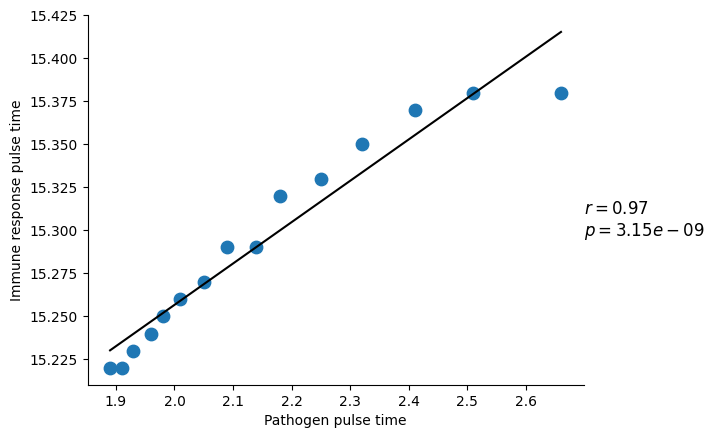

In [53]:
fig,ax = plt.subplots()
ax.spines[['top','right']].set_visible(False)
ax.scatter(v_fwhms,z_fwhms, s = 80)

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(v_fwhms,z_fwhms)
y_fit = slope * np.array(v_fwhms) + intercept
ax.plot(v_fwhms, y_fit, color='black', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
ax.text(1, 0.5, f'$r = {r_value:.2f}$ \n$ p = {p_value:.2e}$', transform=plt.gca().transAxes,
    verticalalignment='top', fontsize=12)
ax.set_xlabel('Pathogen pulse time')
ax.set_ylabel('Immune response pulse time')
fig.savefig('nowak_corr.png',dpi = 600)
fig.savefig('nowak_corr.pdf',dpi = 600)



In [55]:
fwhms = np.array([v_fwhms,z_fwhms])
np.save('nowak_fwhms',fwhms)


In [ ]:
from DynamicModel_Package.DynamicModel2D_Base import DynamicModel2D

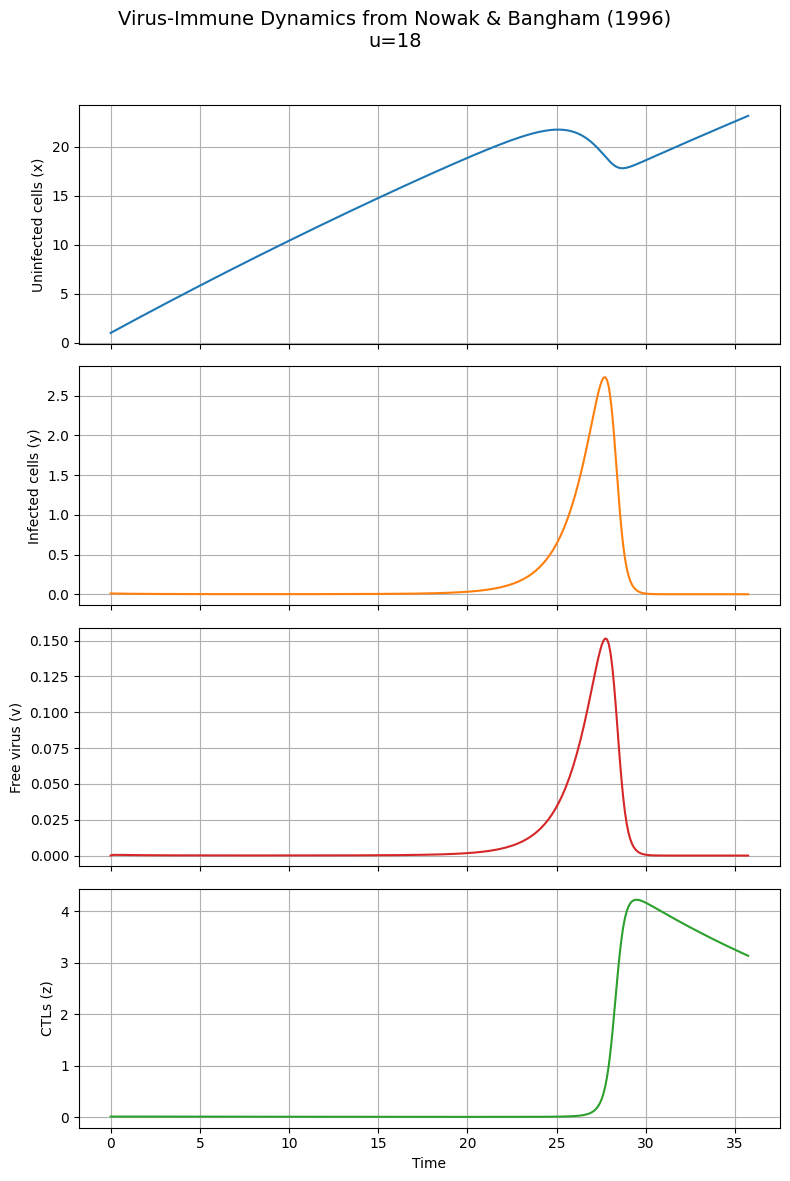

FWHM of virus load (v): 2.10 (from t=26.33 to t=28.43)
FWHM of CTL response (z): 7.41 (from t=28.33 to t=35.74)


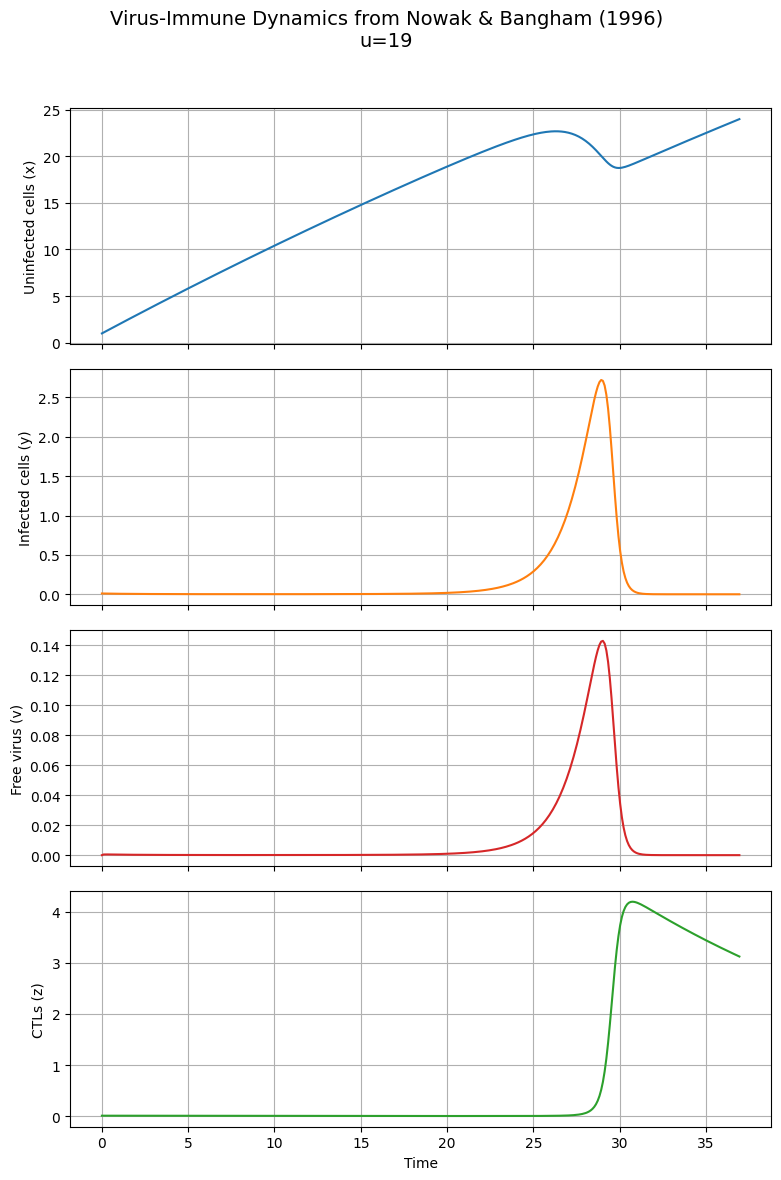

FWHM of virus load (v): 2.20 (from t=27.53 to t=29.73)
FWHM of CTL response (z): 7.41 (from t=29.53 to t=36.94)


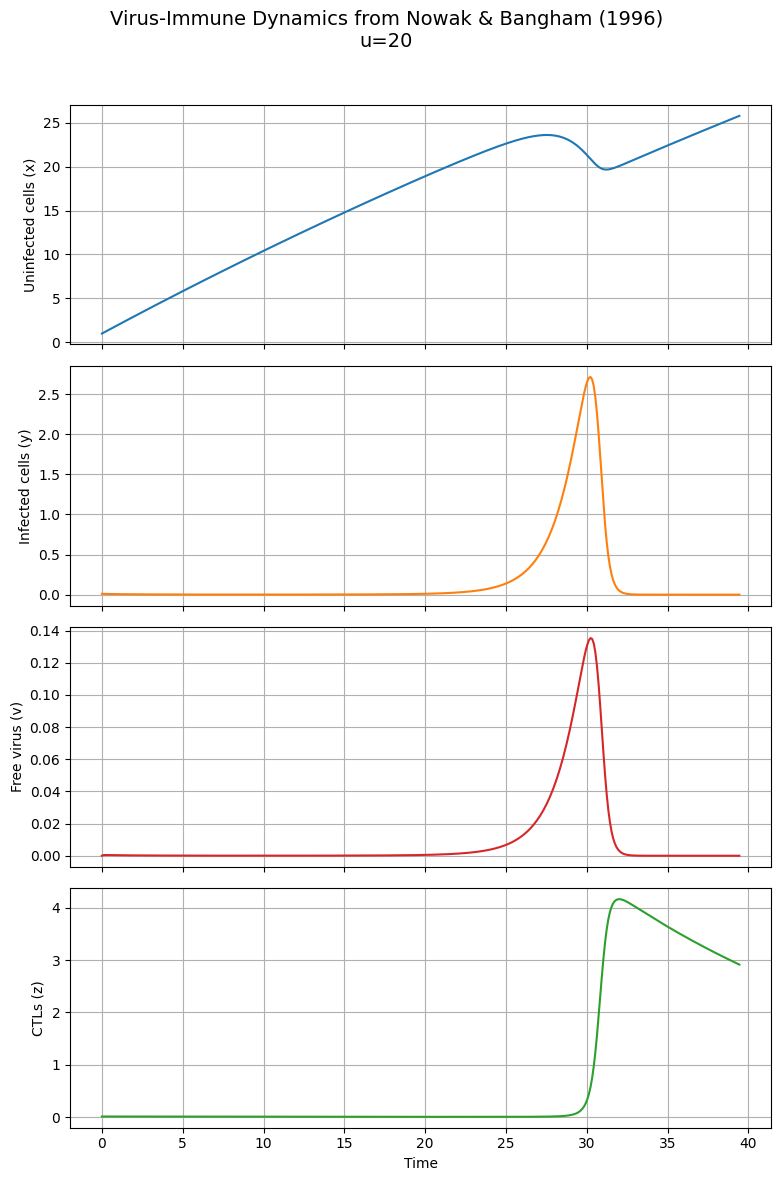

FWHM of virus load (v): 2.20 (from t=28.73 to t=30.93)
FWHM of CTL response (z): 8.61 (from t=30.83 to t=39.44)


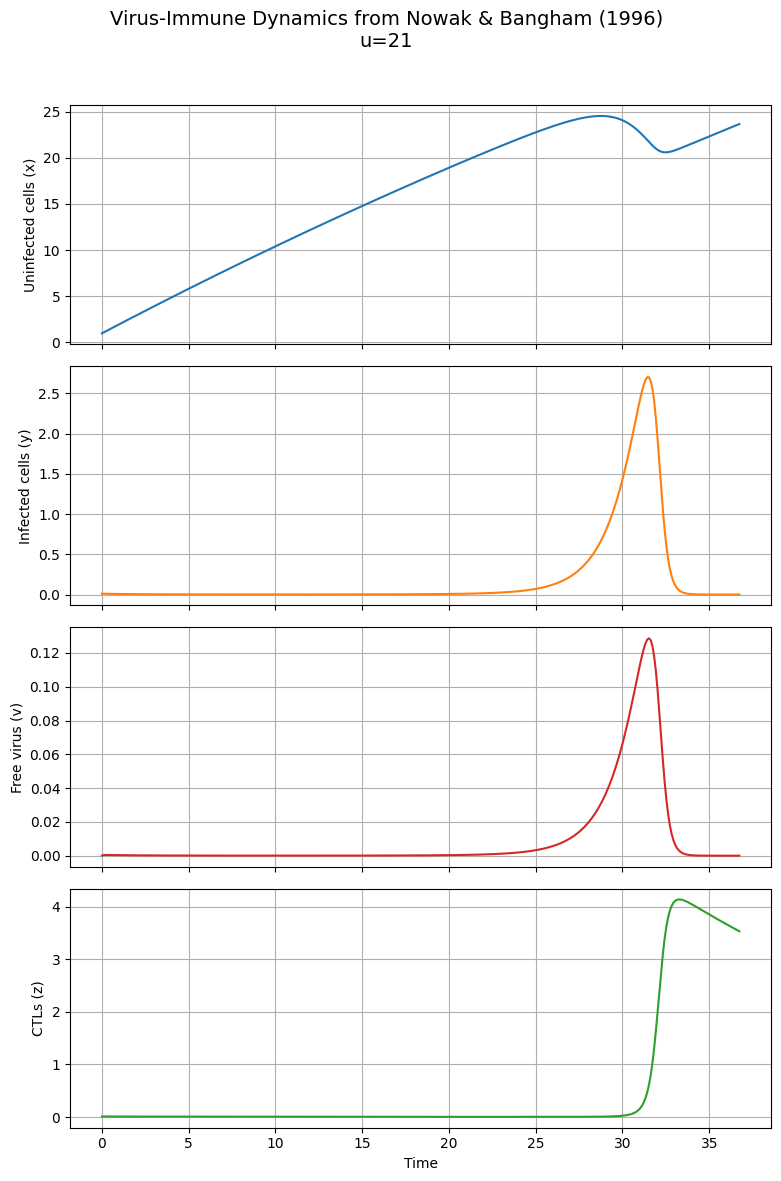

FWHM of virus load (v): 2.20 (from t=30.03 to t=32.23)
FWHM of CTL response (z): 4.60 (from t=32.13 to t=36.74)


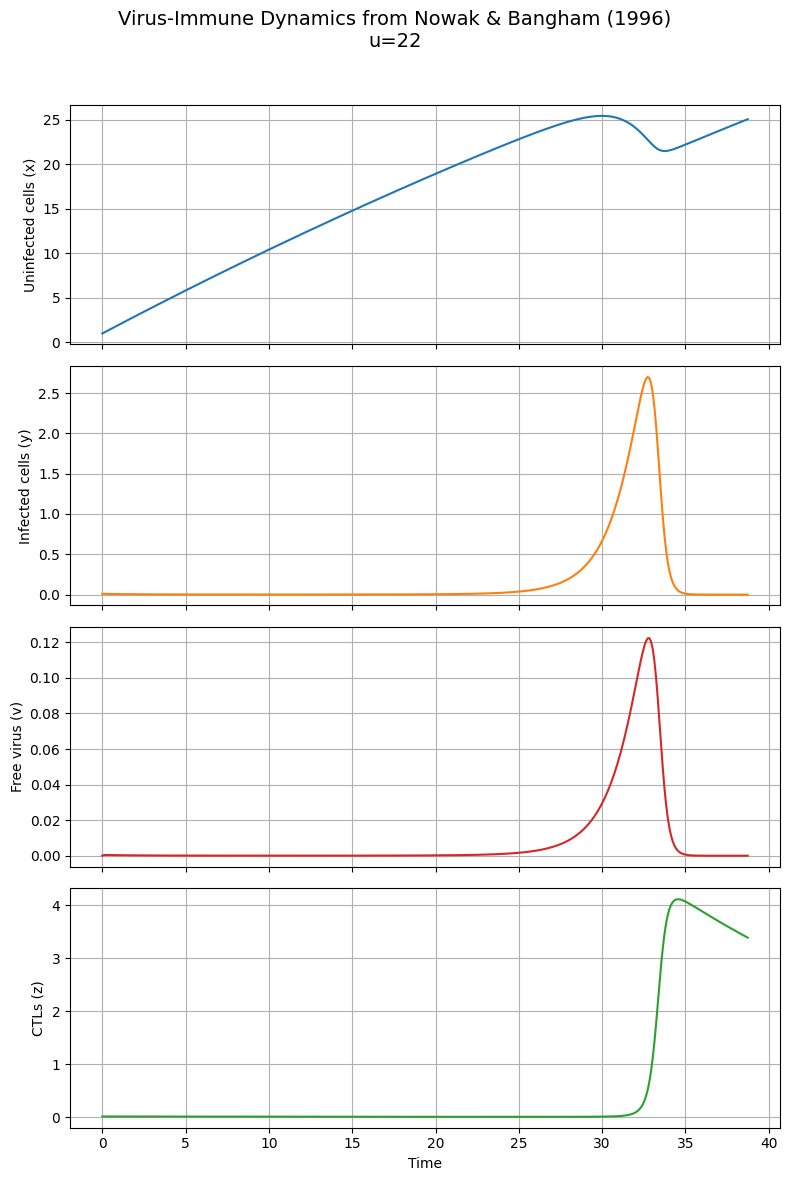

FWHM of virus load (v): 2.30 (from t=31.23 to t=33.53)
FWHM of CTL response (z): 5.41 (from t=33.33 to t=38.74)


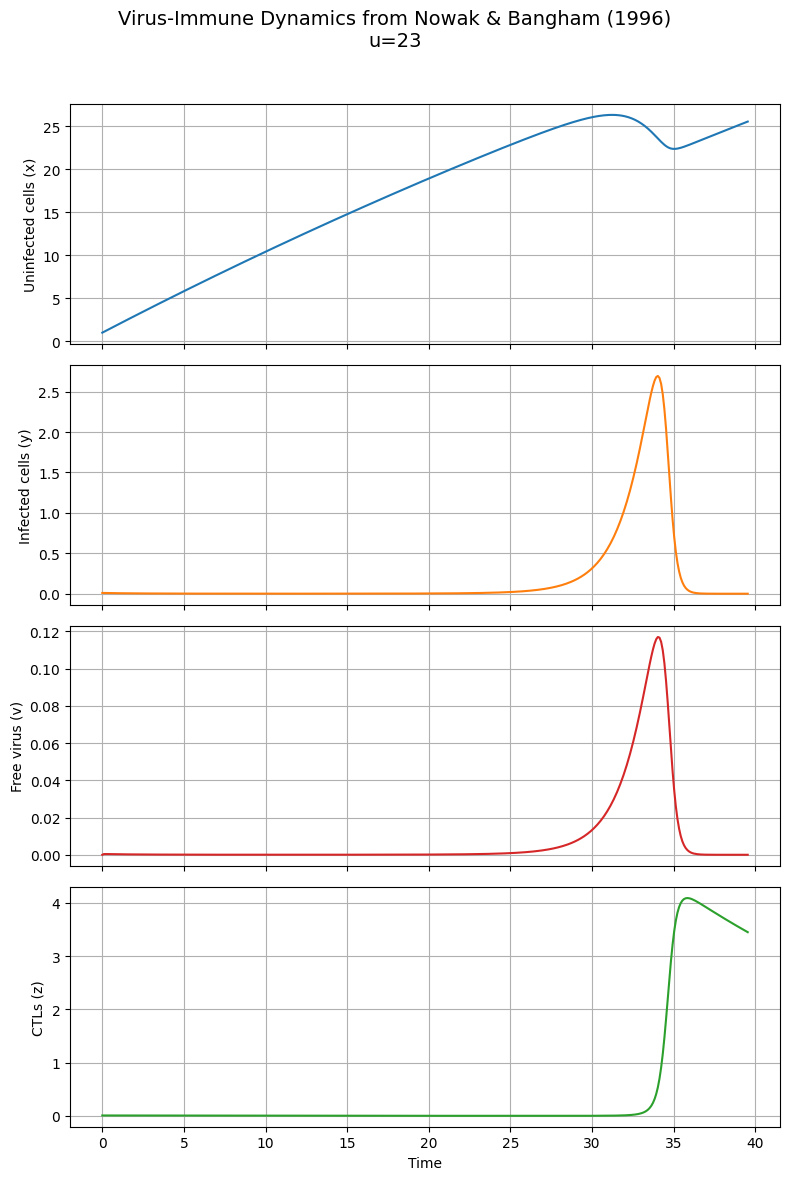

FWHM of virus load (v): 2.20 (from t=32.53 to t=34.73)
FWHM of CTL response (z): 4.90 (from t=34.63 to t=39.54)


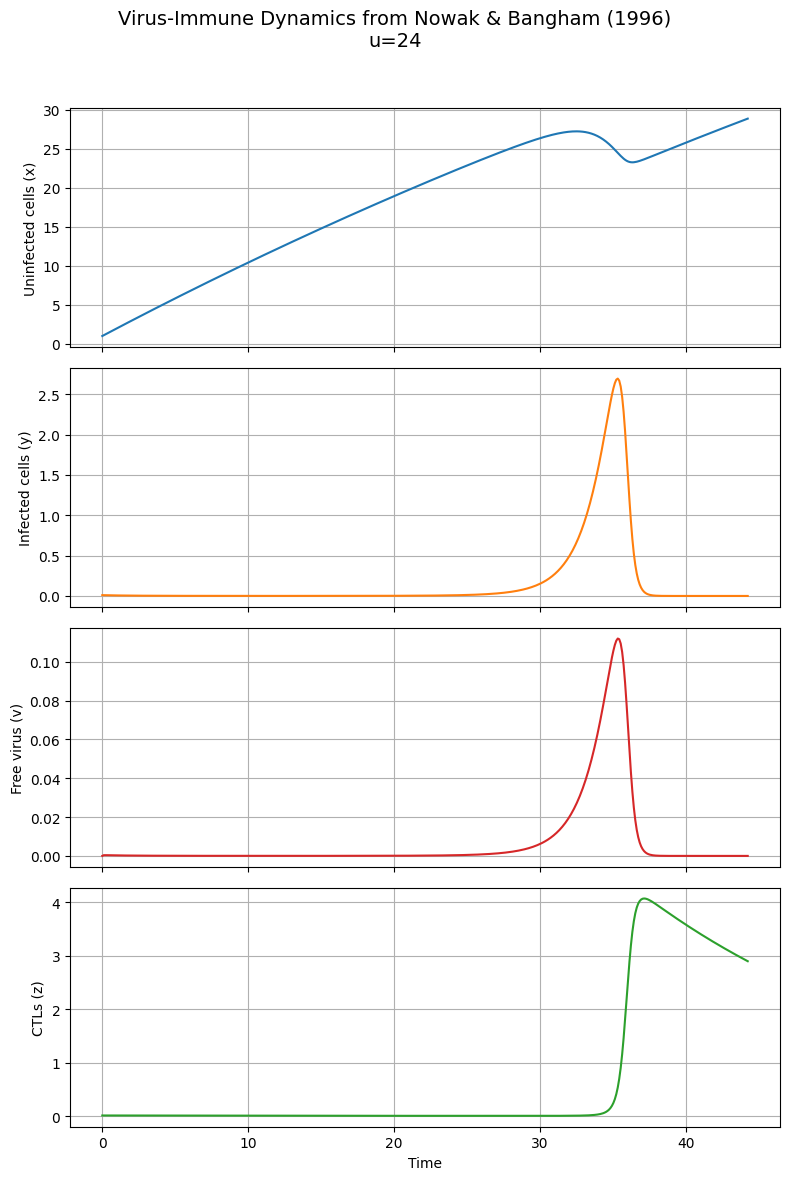

FWHM of virus load (v): 2.20 (from t=33.83 to t=36.04)
FWHM of CTL response (z): 8.31 (from t=35.94 to t=44.24)


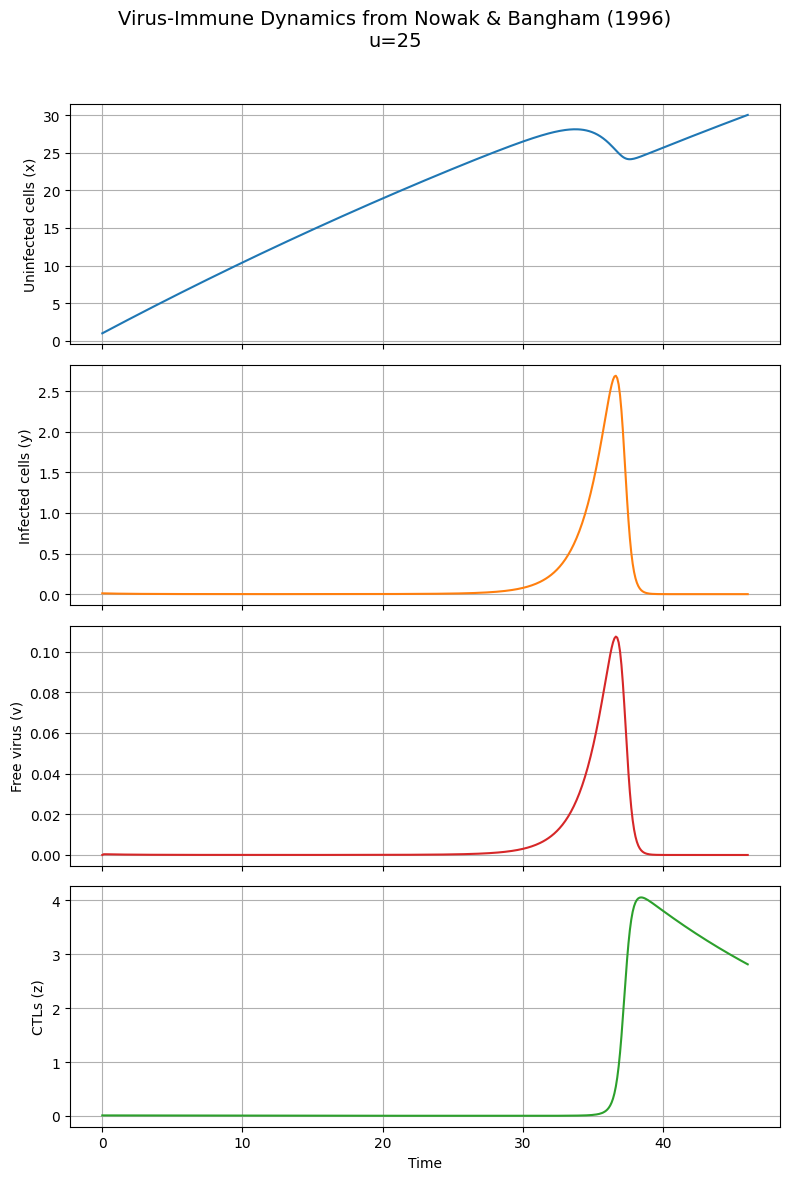

FWHM of virus load (v): 2.30 (from t=35.04 to t=37.34)
FWHM of CTL response (z): 8.81 (from t=37.24 to t=46.05)


In [ ]:
us = [15,20,25,30]
k = 1
us = [18,19,20,21,22,23,24,25]
def euler_intergate_keep_positive (f,y0, dt,t0, tf, args):
    ret = [y0]
    ts = [t0]
    while ts[-1]<tf:
        dXdt = f(ts[-1],ret[-1],args)
        ret.append()
for u in us:
    args = [λ, d, β, a, p, k, u, c, b]
    if u<=25:
        t_span = (0, 100)
    else:
        t_span = (0,150)
    t_eval = np.linspace(*t_span, 1000)
    def stop_if_negative(t, y,λ, d, β, a, p, k, u, c, b):
        return np.min(y)  # event occurs if any variable is 0

    stop_if_negative.terminal = True
    stop_if_negative.direction = -1  # only triggers when crossing 0 from above

    sol = solve_ivp(virus_immune_model, t_span, y0, t_eval=t_eval,method='LSODA',args = args,
                    events=stop_if_negative
    )


    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(8, 12), sharex=True)

    labels = ['Uninfected cells (x)', 'Infected cells (y)', 'Free virus (v)', 'CTLs (z)']
    colors = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green']

    for i in range(4):
        axs[i].plot(sol.t, sol.y[i], color=colors[i])
        axs[i].set_ylabel(labels[i])
        axs[i].grid(True)

    axs[-1].set_xlabel('Time')
    fig.suptitle(f'Virus-Immune Dynamics from Nowak & Bangham (1996)\nu={u}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    def compute_fwhm(t, y):
        """
        Compute Full Width at Half Maximum (FWHM) for a 1D time series y(t).
        
        Parameters:
        - t: time points (1D array)
        - y: signal values (1D array)
        
        Returns:
        - fwhm_time: duration for which y > 0.5 * max(y)
        - t_start, t_end: time bounds of FWHM interval
        """
        half_max = 0.5 * np.max(y)
        above_half = y > half_max
        if not np.any(above_half):
            return 0.0, None, None

        indices = np.where(above_half)[0]
        t_start = t[indices[0]]
        t_end = t[indices[-1]]
        fwhm_time = t_end - t_start
        return fwhm_time, t_start, t_end

    # Example usage:
    # Assume sol is the output from solve_ivp and:
    # sol.y[2] is v(t) — free virus
    # sol.y[3] is z(t) — CTLs

    fwhm_v, t1_v, t2_v = compute_fwhm(sol.t, sol.y[2])
    fwhm_z, t1_z, t2_z = compute_fwhm(sol.t, sol.y[3])

    print(f"FWHM of virus load (v): {fwhm_v:.2f} (from t={t1_v:.2f} to t={t2_v:.2f})")
    print(f"FWHM of CTL response (z): {fwhm_z:.2f} (from t={t1_z:.2f} to t={t2_z:.2f})")
